In [78]:
import matplotlib.pyplot as plt
from numba import jit
import numpy as np
import pandas as pd
from sklearn import linear_model

## Sklearn实现一元线性回归

In [79]:
data = np.c_[np.arange(1000),np.random.randn(1000)/10]
sk_regr = linear_model.LinearRegression().fit(data[:,0:1],data[:,-1:])

In [80]:
sk_regr.coef_ #回归系数

array([[-1.31460137e-05]])

In [81]:
sk_regr.intercept_ #截距

array([0.00289964])

In [82]:
sk_regr.score(data[:,0:1],data[:,-1:]) #拟合的分数

0.0013333132596042852

In [83]:
newdata = np.linspace(0,1151,1151)
newdata = newdata[:,np.newaxis]
predict = sk_regr.predict(newdata) #预测结果向量
predict

array([[ 0.00289964],
       [ 0.00288648],
       [ 0.00287332],
       ...,
       [-0.01220511],
       [-0.01221827],
       [-0.01223142]])

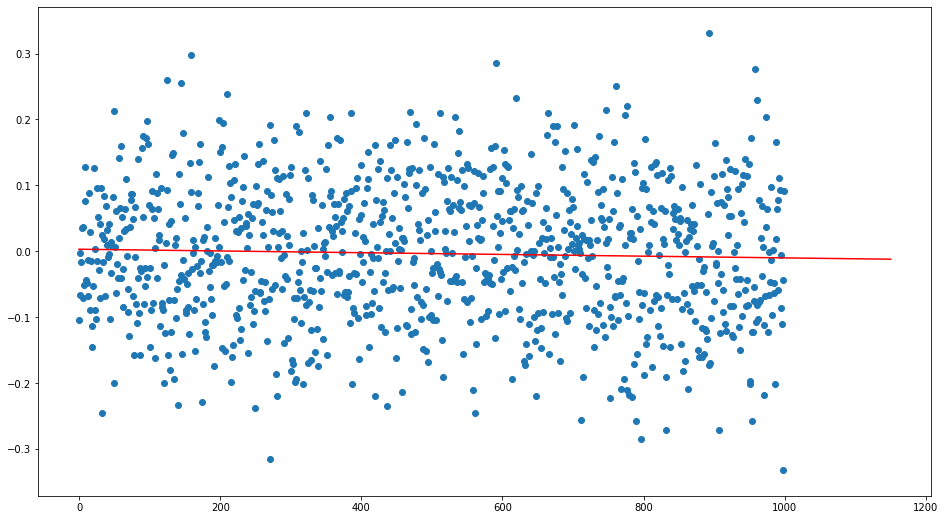

In [84]:
plt.figure(figsize=(16,9))
plt.scatter(data[:,0:1],data[:,-1:])
plt.plot(predict,c='r')#,
plt.show()
plt.close()

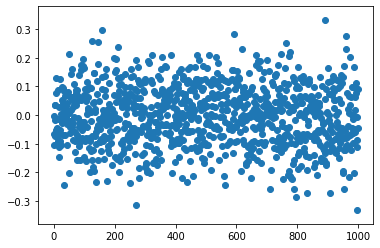

In [85]:
np.log(data) #对数转换，用来实现线性关系变化，后拟合了还能在转回去
plt.scatter(data[:,0:1],data[:,-1:])

In [86]:
srcdata = data[0:,-1:]
def Min_Max_scaled(data):
    '''标准缩放'''
    calculate = lambda vector : (vector-vector.min()) / (vector.max()-vector.min())
    return np.array([np.squeeze(calculate(data[:,i:i+1])) for i in range(data.shape[-1])]).T
my_scaled = Min_Max_scaled(data)

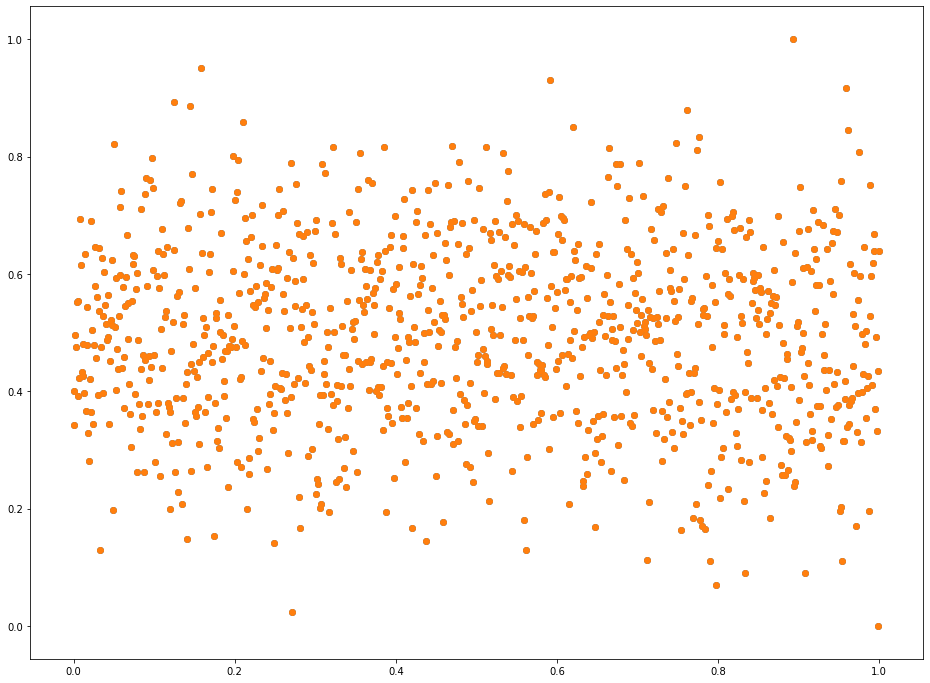

array([[0.        , 0.34297159],
       [0.001001  , 0.39996092],
       [0.002002  , 0.4963102 ],
       ...,
       [0.997998  , 0.        ],
       [0.998999  , 0.43410044],
       [1.        , 0.63828162]])

In [87]:
from sklearn import preprocessing
minmaxscaler = preprocessing.MinMaxScaler().fit_transform(data)#调包实现标准缩放

plt.figure(figsize=(16,12))
plt.scatter(minmaxscaler[:,0:1],minmaxscaler[:,-1:])
plt.scatter(my_scaled[:,0:1],my_scaled[:,-1:])
plt.show()
minmaxscaler

In [88]:
def standard_score(vector):
    '''z分数（z-score），也叫标准分数（standard score）是一个数与平均数的差再除以标准差的过程。
    在统计学中，标准分数是一个观测或数据点的值高于被观测值或测量值的平均值的标准偏差的符号数。
    z分数可以回答这样一个问题："一个给定分数距离平均数多少个标准差?"在平均数之上的分数会得到一个正的
    标准分数，在平均数之下的分数会得到一个负的标准分数。 z分数是一种可以看出某分数在分布中相对位置的
    方法。中文名Z分数外文名z-score中文别名标准分数，标准化变量'''
    calculate = lambda vector : vector - vector.mean() / (vector).std(ddof = 1) #无偏标准差
    np.array([np.squeeze(calculate(data[:,i:i+1])) for i in range(data.shape[-1])]).T 
    return vector[0].std(ddof = 1)

def standard_score2(vector):
    '''z分数（z-score），也叫标准分数（standard score）是一个数与平均数的差再除以标准差的过程。
    在统计学中，标准分数是一个观测或数据点的值高于被观测值或测量值的平均值的标准偏差的符号数。
    z分数可以回答这样一个问题："一个给定分数距离平均数多少个标准差?"在平均数之上的分数会得到一个正的
    标准分数，在平均数之下的分数会得到一个负的标准分数。 z分数是一种可以看出某分数在分布中相对位置的
    方法。中文名Z分数外文名z-score中文别名标准分数，标准化变量'''
    mystd = lambda vector : (vector - np.mean(vector)).sum() / (len(vector) - 1)
    calculate = lambda vector : vector - vector.mean() 
    #calculate = lambda vector : vector - vector.mean() / (vector).std(ddof = 1) #无偏标准差
    np.array([np.squeeze(calculate(data[:,i:i+1])) for i in range(data.shape[-1])]).T 
    return mystd(vector[0])

standard_score2(data),-standard_score(data)

(0.0, -0.07366565264147522)